In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(legacy='1.13')

theta = 4

# model brief: inventory management with usage and reorder decisions 

# state: from 0 (out of stock) to 4 (fully stocked)

# action: 0 (do nothing), 1 (sell one unit), and 2 (restock fully)

# transition rules and utility defined as below

In [2]:
# fundamental modeling parts
beta = 0.95
tolerance = 0.0001

def next_state(x,d):
    if d == 0:
        return x #do nothing 
    if d == 1:
        if x > 0:
            return x-1 #sell one unit
        if x == 0:
            return x #can not go below zero 
    if d == 2: 
        return 4 #fully re-stock inventory 

# def utility(x,d): #utility cost decreases with inventory amount (-x component)
#     if d == 0:
#         return -x #holding cost
#     if d == 1: 
#         if x > 0:
#             return 5 - x #sell one unit
#         elif x == 0: #if sell one unit but no unit present
#             return -10 - x #lost sale penalty
#     if d == 2:
#         return -8 - x #restocking cost
    
# Experimental 
def utility(x,d): #utility cost decreases with inventory amount (-x component)
    if d == 0: #if you do nothing, then holding cost
        return -x #holding cost
    if d == 1: #if you sell, then no holding cost
        if x > 0:
            return theta - x #sell one unit (+3) and holding cost
        elif x == 0: #if sell one unit but no unit present
            return -theta - x #lost sale penalty
    if d == 2:
        return -theta +x    #restocking cost


In [3]:
# Solve: part a (value function iteration)
V = np.zeros(5)

def iterate(value): #no return - change in-place the value function
    reference = value.copy()
    for i in range(5): #iterate over all states
        state = i
        v0 = np.exp(utility(state,0) + beta*reference[next_state(state,0)])
        v1 = np.exp(utility(state,1) + beta*reference[next_state(state,1)])
        v2 = np.exp(utility(state,2) + beta*reference[next_state(state,2)])
        value[i] = np.log(v0 + v1 + v2)


zero = []
one = []
two = []
three = []
four = []
#iterating procedure 
distance = 1
while distance > tolerance:
    zero.append(V[0])
    one.append(V[1])
    two.append(V[2])
    three.append(V[3])
    four.append(V[4])
    temp = V.copy()
    iterate(V)
    distance = sum(abs(V - temp))

print("we iterated", len(one), "times")
print("the converged EV function is", V)

we iterated 206 times
the converged EV function is [ 12.717  15.38   16.738  17.055  16.782]


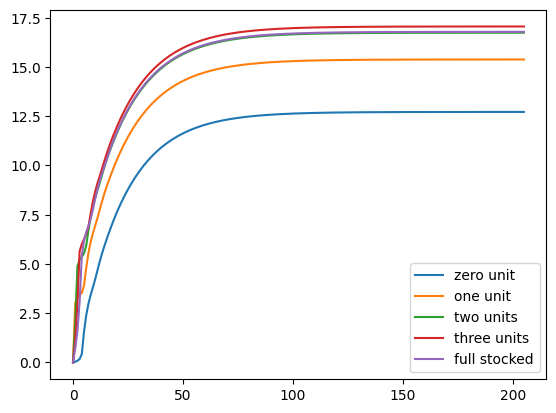

the converged value function: [ 12.717  15.38   16.738  17.055  16.782]


In [4]:
#visualization 
x = np.arange(len(one))  # Time axis from 0 to 99

plt.plot(x,zero, label='zero unit')
plt.plot(x,one, label='one unit')
plt.plot(x,two, label='two units')
plt.plot(x,three, label='three units')
plt.plot(x,four, label='full stocked')
plt.legend()
plt.show()

#this shows that the value function actually converges 
print("the converged value function:", V)

In [5]:
# Solve: part b (deriving choice probability)

def choice_value(x,d):
    return utility(x,d) + beta*V[next_state(x,d)]

choice_prob = [[],[],[]] #three decisions, states appended after 

for i in range(5):  #iterate over each state
    sum_value = sum([np.exp(choice_value(i,d)) for d in range(3)])
    choice_prob[0].append(np.exp(choice_value(i,0))/sum_value)
    choice_prob[1].append(np.exp(choice_value(i,1))/sum_value)
    choice_prob[2].append(np.exp(choice_value(i,2))/sum_value)


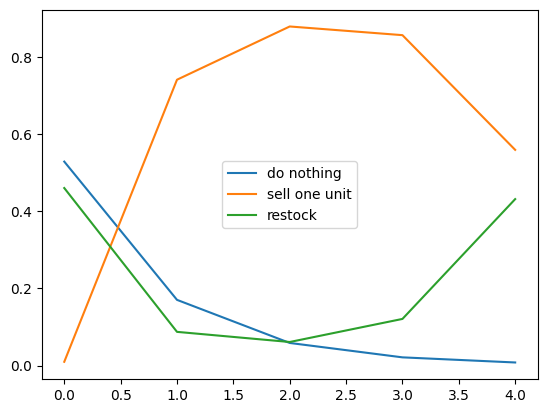

In [6]:
# visualization 
x = np.arange(5)  # Time axis from 0 to 99

plt.plot(x,choice_prob[0], label='do nothing')
plt.plot(x,choice_prob[1], label='sell one unit')
plt.plot(x,choice_prob[2], label='restock')

plt.legend()
plt.show()

#day 0: should restock 
#day 1: should do nothing 
#day 2,3,4: should sell one unit 


In [7]:
# now we will do simulation 
inventory = 2
T = 1000 #number of simulations
inventory_path = []
action_path = []

for t in range(T):
    # 1. Store current state
    inventory_path.append(inventory)
    # 2. Get probabilities for current state
    probs = [choice_prob[d][inventory] for d in range(3)]
    # 3. Randomly draw action
    action = np.random.choice([0, 1, 2], p=probs)
    action_path.append(action)
    # 4. Transition to next state
    inventory = next_state(inventory, action)

print(inventory_path)
print(action_path)


[2, 1, 0, 0, 0, 4, 4, 3, 2, 1, 0, 4, 4, 3, 2, 1, 0, 0, 0, 4, 4, 3, 2, 1, 0, 4, 3, 4, 3, 2, 1, 0, 0, 4, 3, 2, 1, 0, 4, 4, 4, 3, 3, 2, 1, 4, 4, 3, 2, 1, 1, 0, 4, 4, 3, 2, 1, 0, 0, 0, 0, 0, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 0, 0, 0, 0, 4, 4, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 4, 4, 3, 2, 1, 0, 0, 4, 3, 2, 1, 0, 0, 0, 4, 4, 3, 2, 1, 0, 4, 4, 4, 4, 4, 4, 4, 3, 2, 1, 1, 0, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 4, 3, 2, 1, 1, 0, 0, 0, 0, 0, 4, 4, 4, 3, 2, 1, 4, 4, 4, 3, 2, 4, 3, 2, 1, 1, 1, 1, 0, 4, 4, 4, 4, 4, 3, 2, 1, 0, 0, 0, 4, 3, 4, 4, 3, 2, 1, 0, 0, 4, 4, 4, 3, 2, 1, 1, 0, 4, 4, 3, 2, 1, 0, 0, 0, 4, 3, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 4, 4, 4, 3, 2, 1, 0, 4, 3, 2, 1, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 0, 4, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 3, 2, 1, 0, 4, 3, 4, 4, 4, 3, 2, 1, 4, 4, 3, 2, 1, 0, 0, 4, 4, 3, 2, 2, 2, 1, 0, 4, 3, 2, 1, 0, 0, 0, 0, 4, 3, 2, 1, 0, 0, 4, 3, 2, 1, 0, 4, 4, 4, 3, 2, 1, 0, 0, 4, 4, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 0, 0, 0, 4, 4, 3, 3, 2, 1, 0, 4, 3, 2, 1, 4, 4, 4, 3, 2, 1, 0, 0, 

In [ ]:
# now we perform structural estimation based on the simulated data 
# here are the functions to be redefined 

def c_utility(x,d, theta): #utility cost decreases with inventory amount (-x component)
    if d == 0: #if you do nothing, then holding cost
        return -x #holding cost
    if d == 1: #if you sell, then no holding cost
        if x > 0:
            return theta - x #sell one unit (+3) and holding cost
        elif x == 0: #if sell one unit but no unit present
            return -theta - x #lost sale penalty
    if d == 2:
        return -theta +x    #restocking cost

c_V = np.zeros(5)

def c_choice_value(x,d, theta, value):
    return c_utility(x,d, theta) + beta*value[next_state(x,d)]

def c_iterate(value, theta): #no return - change in-place the value function
    reference = value.copy()
    for i in range(5): #iterate over all states
        state = i
        v0 = np.exp(c_utility(state,0, theta) + beta*reference[next_state(state,0)])
        v1 = np.exp(c_utility(state,1, theta) + beta*reference[next_state(state,1)])
        v2 = np.exp(c_utility(state,2, theta) + beta*reference[next_state(state,2)])
        value[i] = np.log(v0 + v1 + v2)

def solve_model(theta):
    c_V = np.zeros(5)
    distance = 1
    while distance > 0.1:
        temp = c_V.copy()
        c_iterate(c_V, theta)
        distance = sum(abs(V - temp))
    return c_V

def c_choice_probability(theta):
    #finished iteration procedure here
    c_V = solve_model(theta)
    choice_prob = [[],[],[]] #three decisions, states appended after 
    for i in range(5):  #iterate over each state
        sum_value = sum([np.exp(c_choice_value(i,d, theta, c_V)) for d in range(3)])
        choice_prob[0].append(np.exp(c_choice_value(i,0, theta, c_V))/sum_value)
        choice_prob[1].append(np.exp(c_choice_value(i,1, theta, c_V))/sum_value)
        choice_prob[2].append(np.exp(c_choice_value(i,2, theta, c_V))/sum_value)
    return choice_prob


#now for each observations we sum up to our likelihood function
def likelihood_function(theta):
    choice_prob = c_choice_probability(theta)
    likelihood_sum = 0
    for i in range(T):
        likelihood_sum += np.log(max(choice_prob[action_path[i]][inventory_path[i]], 1e-10))
    return -likelihood_sum

result = minimize(likelihood_function, [5])

print("theta cost variable found to be equal", result)


choice probability matrix [[0.52946344783309329, 0.17050150436295605, 0.058605051818051972, 0.021221136127132719, 0.0079140833760859286], [0.0096974613152950844, 0.74208508477246493, 0.88031495662938575, 0.85778742891407433, 0.55999160508156198], [0.46083909085161173, 0.087413410864579086, 0.061079991552562239, 0.120991434958793, 0.43209431154235223]]


/var/folders/jb/hgpyq8d53z55039vmxnn8_4h0000gn/T/ipykernel_47885/4191394835.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  value[i] = np.log(v0 + v1 + v2)
